In [8]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
recipes = pd.read_csv(r"C:\Users\gobus\Desktop\,\ML-AI-Blog\Machine Learning Full\Machine Learning Tutorial Part 1 _ 2\Cupcakes vs Muffins.csv")

In [10]:
print(recipes.head())

     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0


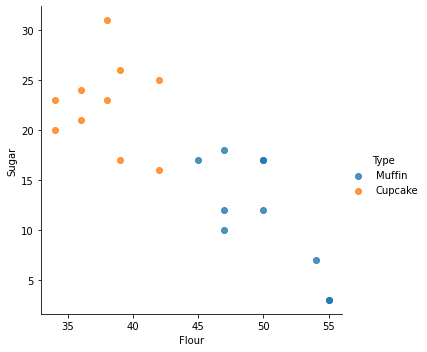

In [18]:
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue="Type", fit_reg=False)

In [26]:
type_label = np.where(recipes["Type"]=='Muffin', 0, 1)
recipe_features = recipes.columns.values[1:].tolist()#Names of columns apart from 'Type'
ingredients = recipes[["Flour", "Sugar"]].values
print(ingredients)

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']
[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [27]:
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(kernel='linear')

In [29]:
w = model.coef_[0]
slope = -w[0]/w[1]
xx = np.linspace(30, 60)
yy = slope*xx - (model.intercept_[0])/w[1]

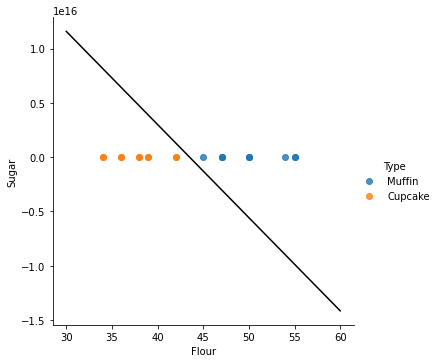

In [32]:
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue="Type", fit_reg=False)
plt.plot(xx, yy, color="black")

In [33]:
#creating a function to predict muffin or cupcake
def muffin_or_cupcake(flour, sugar):
    if (model.predict([[flour, sugar]]))==0:
        print("Muffin Recipe")
    else:
        print("Cupcake Recipe")

muffin_or_cupcake(50, 20)

Muffin Recipe


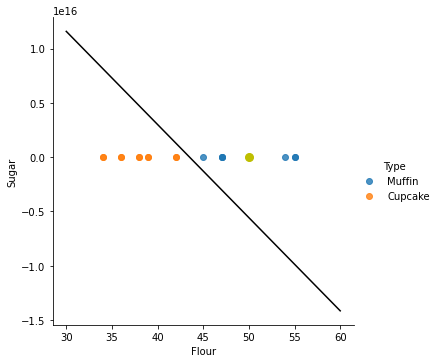

In [36]:
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue="Type", fit_reg=False)
plt.plot(xx, yy, color="black")
plt.plot(50, 20, 'yo', markersize='8')